In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
from scipy import stats
import sympy as sym

In [33]:
Data = pd.read_excel("data\Data_Hall_Effect.xlsx")

B_Zn = Data["B_Zn"].to_numpy()*1e-3
I_B_Zn = Data["I_Zn"].to_numpy()

B_Cu = Data["B_Cu"].to_numpy()*1e-3
I_B_Cu = Data["I_Cu"].to_numpy()

I_board_Zn = Data["I_board_Zn"].to_numpy()
hall_voltage_Zn = Data["hall_voltage"].to_numpy()*1e-5
I_field_Zn = Data["I_field_Zn"].to_numpy()*1e-3
hall_volt_Zn_neg = Data["hall_volt_Zn_neg"].to_numpy()*1e-5
I_board_Zn_neg = Data["I_board_Zn_neg"].to_numpy()

hall_volt_Cu = (Data["hall_volt_Cu"].to_numpy())[0:8]*1e-5
I_board_Cu = (Data["I_board_Cu"].to_numpy())[0:8]

def B_funct(m,b,I):
    return m*I+b


In [34]:
Data

,B_Zn,I_Zn,B_Cu,I_Cu,I_board_Zn,hall_voltage,I_field_Zn,hall_volt_Zn_neg,I_board_Zn_neg,hall_volt_Cu,I_board_Cu,I_field _Cu
0,0.8,0.1,1.7,0.1,-0.54,-1.53,1.1,1.28,0.45,0.05,-1.06,1.05
1,1.5,0.2,2.9,0.2,-1.00,-2.90,NaN,3.15,1.09,0.17,-2.03,NaN
2,2.2,0.3,4.3,0.3,-1.50,-4.23,NaN,4.53,1.60,0.13,-3.18,NaN
3,2.8,0.4,5.8,0.4,-2.03,-5.85,NaN,6.13,2.05,0.29,-4.17,NaN
4,3.4,0.5,7.3,0.5,-2.53,-7.25,NaN,7.15,2.46,0.23,-4.40,NaN
5,4.1,0.6,8.7,0.6,-3.05,-8.82,NaN,9.21,3.14,0.29,-5.11,NaN
6,4.8,0.7,10.1,0.7,-3.52,-10.14,NaN,10.93,3.76,0.36,-6.16,NaN
7,5.5,0.8,11.4,0.8,-3.98,-11.42,NaN,11.97,4.10,0.34,-7.14,NaN
8,6.1,0.9,12.8,0.9,-4.54,-13.02,NaN,13.43,4.57,NaN,NaN,NaN
9,6.7,1.0,14.1,1.0,-5.05,-13.93,NaN,14.01,4.98,NaN,NaN,NaN


(0.006575757575757573,
 0.00017333333333333095,
 array([4.84848485e-05, 3.00840573e-05]))

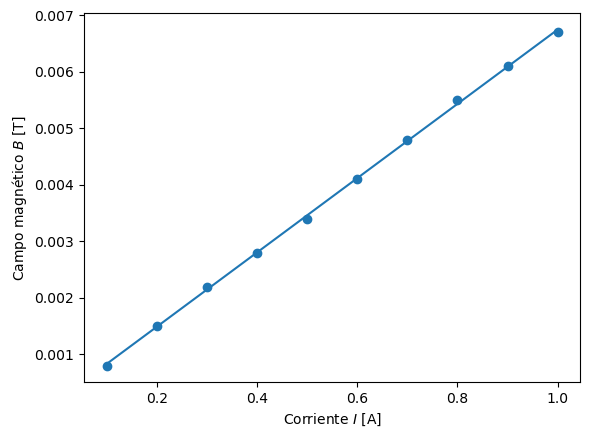

In [35]:
(m1,b1_),cov = np.polyfit(I_B_Zn,B_Zn,1,cov=True)
I_1 = np.linspace(I_B_Zn[0],I_B_Zn[-1])
B_1 = m1*I_1 + b1_
plt.scatter(I_B_Zn,B_Zn)
plt.plot(I_1,B_1)
#plt.text(0.6,2,r"$B = %s I + %s$"%(round(m1,3),round(b1,3)))
plt.ylabel(r"Campo magnético $B$ [T]")
plt.xlabel(r"Corriente $I$ [A]")

plt.savefig("B_field_Zn.pdf")
m1,b1_,np.sqrt(np.diag(cov))

(0.013981818181818179,
 0.00021999999999999488,
 array([1.02045201e-04, 6.33173824e-05]))

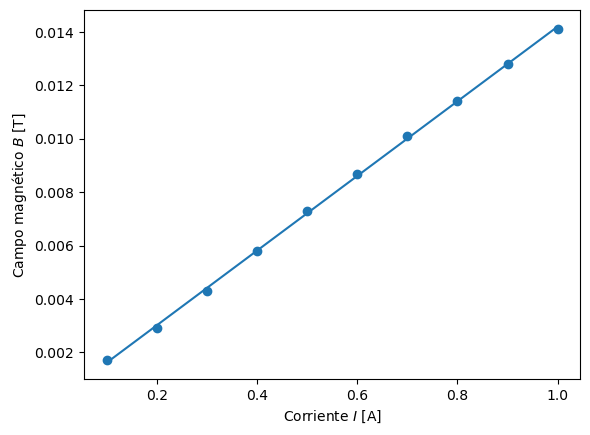

In [36]:
(m2,b2_),cov = np.polyfit(I_B_Cu,B_Cu,1,cov=True)
I_2 = np.linspace(I_B_Cu[0],I_B_Cu[-1])
B_2 = m2*I_2 + b2_

plt.scatter(I_B_Cu,B_Cu)
plt.plot(I_2,B_2)
#plt.text(0.6,2,r"$B = %s I + %s$"%(round(m2,3),round(b2,3)))
plt.ylabel(r"Campo magnético $B$ [T]")
plt.xlabel(r"Corriente $I$ [A]")
plt.savefig("B_field_Cu.pdf")
m2,b2_,np.sqrt(np.diag(cov))

(2.8699007275397042e-05,
 6.899228326658702e-07,
 array([1.28256034e-07, 4.03963753e-07]))

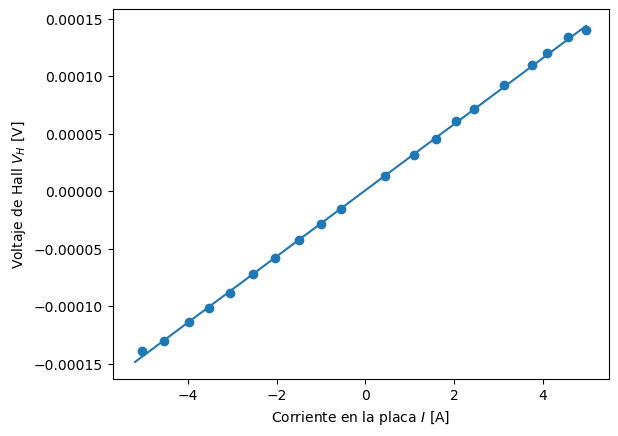

In [37]:
plt.scatter(I_total_Zn,hall_voltage_total_Zn)
(a1,b1),cov= np.polyfit(I_total_Zn,hall_voltage_total_Zn,1,cov=True)
I_Zn = np.linspace(-5.2,I_total_Zn[-1])
V_H_Zn = a1*I_Zn + b1


plt.plot(I_Zn,V_H_Zn)
plt.xlabel(r"Corriente en la placa $I$ [A]")
plt.ylabel(r"Voltaje de Hall $V_H$ [V]")
a1,b1
plt.savefig("hall_volt_Zn_pos.pdf")
a1,b1,np.sqrt(np.diag(cov))

(-4.937423974112011e-07,
 2.72883160759697e-07,
 array([8.16550117e-08, 3.73234756e-07]))

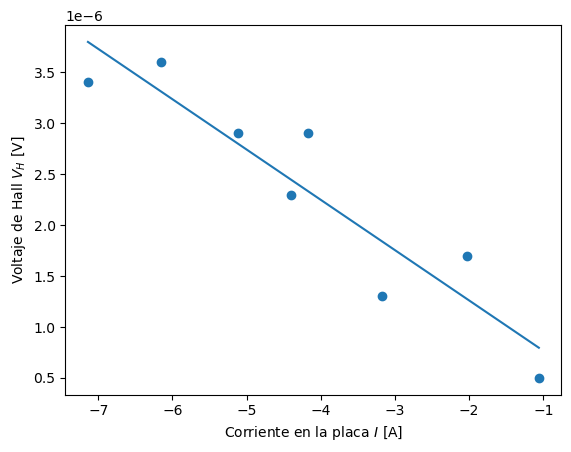

In [38]:
plt.scatter(I_board_Cu,hall_volt_Cu)
(a3,b3),cov= np.polyfit(I_board_Cu,hall_volt_Cu,1,cov=True)
I_Cu_neg = np.linspace(I_board_Cu[0],I_board_Cu[-1])
V_H_Cu_neg = a3*I_Cu_neg + b3
plt.plot(I_Cu_neg,V_H_Cu_neg)
plt.xlabel(r"Corriente en la placa $I$ [A]")
plt.ylabel(r"Voltaje de Hall $V_H$ [V]")
plt.savefig("hall_volt_Cu_neg.pdf")
a3,b3,np.sqrt(np.diag(cov))

In [39]:
d_Zn = 25e-6
d_Cu = 18e-6
B_Copper = m2*1.05 
B_Zinc = m2*1.1
B_Zinc,B_Copper

(0.015379999999999998, 0.014680909090909088)

In [40]:
a3*d_Cu/(B_Copper)

-6.053687205859053e-10

In [41]:
a1*d_Zn/(B_Zinc)

4.664988178705632e-08

In [45]:
def GetPropagation(expr,vars,sigmas,measures):
    prop = 0
    for i in range(len(measures)):
        prop += expr.diff(var[i])**2 * sigmas[i]**2
    
    sigma = sym.sqrt(prop)
    print(sigma)
    #Sección para soltar el valor calculado y la incertidumbre del valor calculado. 
    
    sigma = sym.lambdify(var,sigma)
    mean = sym.lambdify(var,expr)
    print(mean)
    return mean(*measures),sigma(*measures)

In [46]:
vars = "a B"
var = sym.symbols(vars)
exp1 = var[0]*d_Zn/var[1]
exp2 = var[0]*d_Cu/var[1]

mea1 = np.array([a1,B_Zinc])
mea2 = np.array([a3,B_Copper])
un1 = np.array([0.04e-5,0.04e-3])
un2 = np.array([0.8e-7,0.1e-3])

print(GetPropagation(exp1,var,un1,mea1))
print(GetPropagation(exp2,var,un2,mea2))

1.0e-9*sqrt(0.0001/B**2 + a**2/B**4)
<function _lambdifygenerated at 0x0000014D29959F70>
(4.664988178705632e-08, 6.614178969080203e-10)
1.8e-9*sqrt(6.4e-7/B**2 + a**2/B**4)
<function _lambdifygenerated at 0x0000014D299593A0>
(-6.053687205859053e-10, 9.817320569904269e-11)
